In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
import pandas as pd

In [ ]:
def subgradient_method(h, subgradient_h, x0, max_iter, step_size, epsilon):
    x = x0
    history = [x]
    diffs_x = []  # Pour les différences entre itérations
    diffs_h = []  # Pour les différences des images

    for k in range(max_iter):
        s = subgradient_h(x)
        if np.linalg.norm(s) == 0:
            break
        beta = step_size if isinstance(step_size, float) else step_size(k)
        x_next = x - beta * s / np.linalg.norm(s)
        
        # Stocker les différences
        diffs_x.append(np.linalg.norm(x_next - x))
        diffs_h.append(abs(h(x_next) - h(x)))
        
        if np.linalg.norm(x_next - x) < epsilon:
            break
        x = x_next
        history.append(x)
    
    return x, history, diffs_x, diffs_h


In [ ]:
def proximal_gradient_method(h_prox, grad_f, x0, max_iter, step_size, epsilon):
    x = x0
    history = [x]
    diffs_x = []  # Pour les différences entre itérations
    diffs_h = []  # Pour les différences des images

    for k in range(max_iter):
        x_next = h_prox(x - step_size * grad_f(x), step_size)
        
        # Stocker les différences
        diffs_x.append(np.linalg.norm(x_next - x))
        diffs_h.append(abs(h_prox(x_next, step_size) - h_prox(x, step_size)))
        
        if np.linalg.norm(x_next - x) < epsilon:
            break
        x = x_next
        history.append(x)
    
    return x, history, diffs_x, diffs_h


In [ ]:
import matplotlib.pyplot as plt

def plot_results(history, diffs_x, diffs_h, method_name):
    iterations = range(len(history))
    
    # Graphe 1 : Valeurs des itérations
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.plot(iterations, [np.linalg.norm(x) for x in history], marker='o')
    plt.title(f"{method_name} - Valeurs des itérations")
    plt.xlabel("Itération")
    plt.ylabel("Norme de x")
    
    # Graphe 2 : Différences entre x_new et x_old
    plt.subplot(1, 3, 2)
    plt.plot(range(len(diffs_x)), diffs_x, marker='o')
    plt.title(f"{method_name} - Différences entre x_new et x_old")
    plt.xlabel("Itération")
    plt.ylabel(r"$\|x_{new} - x_{old}\|$")
    
    # Graphe 3 : Différences entre h(x_new) et h(x_old)
    plt.subplot(1, 3, 3)
    plt.plot(range(len(diffs_h)), diffs_h, marker='o')
    plt.title(f"{method_name} - Différences des images")
    plt.xlabel("Itération")
    plt.ylabel(r"$|h(x_{new}) - h(x_{old})|$")
    
    plt.tight_layout()
    plt.show()


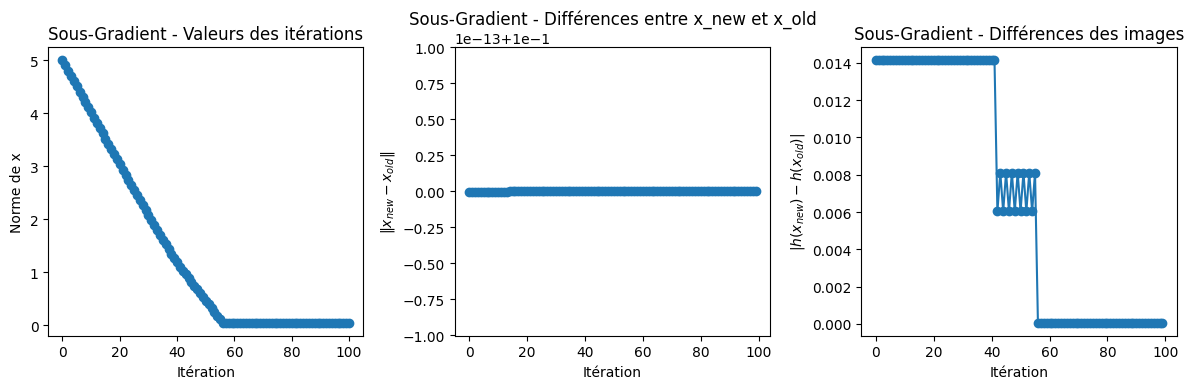

In [10]:
# Fonction pour le seuil doux (soft-thresholding) : l1_proximal
def l1_proximal(x, lambda_):
    return np.sign(x) * np.maximum(np.abs(x) - lambda_, 0)

# Configuration des paramètres
lambda_ = 0.1
x0 = np.array([3.0, -4.0, 0.0])
max_iter = 100
step_size = 0.1
epsilon = 1e-6

# Fonction objectif pour le sous-gradient
h = lambda x: lambda_ * np.sum(np.abs(x))
subgradient_h = lambda x: np.sign(x) * lambda_  # Sous-gradient de la norme L1

# Appel de l'algorithme de sous-gradient
x_opt, history, diffs_x, diffs_h = subgradient_method(h, subgradient_h, x0, max_iter, step_size, epsilon)

# Tracé des graphes pour le sous-gradient
plot_results(history, diffs_x, diffs_h, "Sous-Gradient")


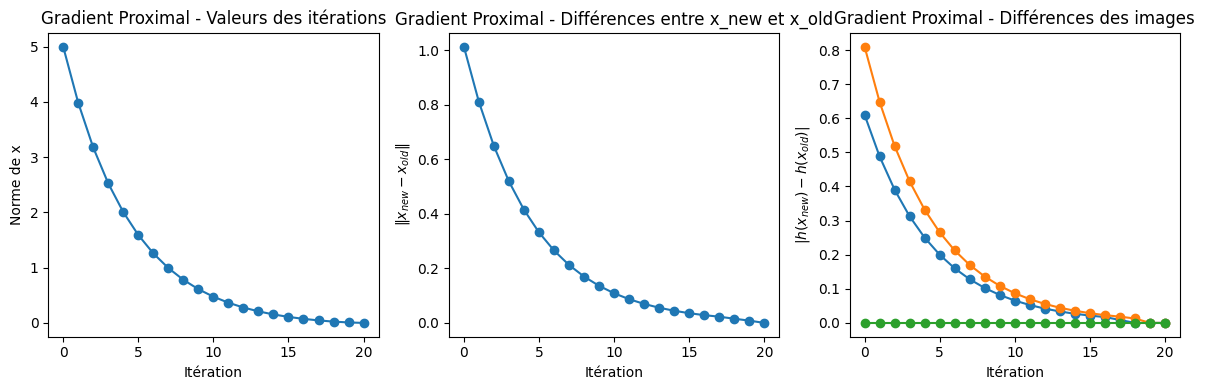

In [12]:
f = lambda x: np.sum(x**2)
grad_f = lambda x: 2 * x

x_opt, history, diffs_x, diffs_h = proximal_gradient_method(
    lambda y, t: l1_proximal(y, t * lambda_), grad_f, x0, max_iter, step_size, epsilon
)
plot_results(history, diffs_x, diffs_h, "Gradient Proximal")
